C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


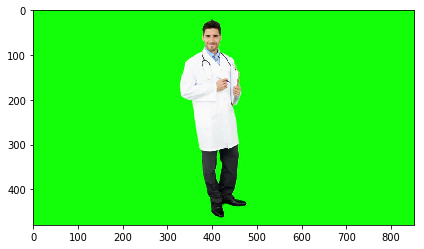

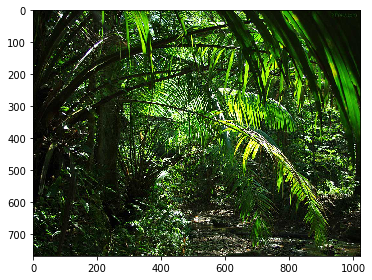

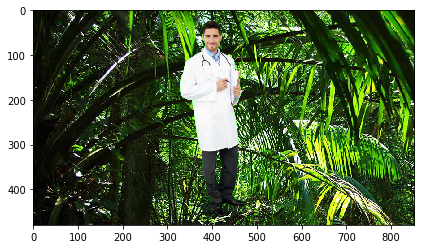

In [2]:
from skimage import io
import matplotlib.pyplot as plt  
import math
import numpy as np

def distance(color1, color2): 
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow((color1[i]-color2[i]),2)
    return math.sqrt(dif)

def chromakey(image,newBg,thresh,bgColor):  
    rows,cols,dims=image.shape  
    #print(rows)
    ret_img = np.uint8(np.zeros((rows,cols,3)))
    for i in range(0,rows):
        for j in range(0,cols):
            dif = distance(image[i,j],bgColor)
            if dif < thresh:
                for k in range(0,3):  
                    ret_img[i,j,k] = newBg[i,j,k]
            else:
                for k in range(0,3): 
                    ret_img[i,j,k] = image[i,j,k]
    return ret_img

img=io.imread('chromakey.jpg')  
io.imshow(img)

img2=io.imread('jungle1.jpg') 
plt.figure()
io.imshow(img2)

bgcolor = [0, 255, 0]
threshold = 100

img3 = chromakey(img, img2, threshold, bgcolor) 
plt.figure()
io.imshow(img3)
